In [1]:
!python --version

Python 3.9.6


In [2]:
import tensorflow as tf

/Users/mrc/project/learningml/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.mnist.load_data()

print(train_image.shape)
print(test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


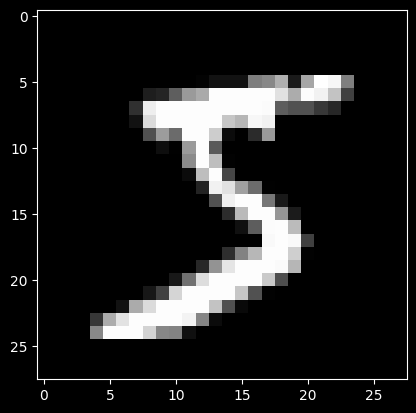

In [4]:
# show a first train images
import matplotlib.pyplot as plt

plt.imshow(train_image[0], cmap='gray')

In [5]:
# 归一化
norm_l = tf.keras.layers.Normalization()
norm_l.adapt(train_image)

norm_image = norm_l(train_image)
norm_image_test = norm_l(test_image)

print(norm_image.shape)

(60000, 28, 28)


In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

/Users/mrc/project/learningml/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ['accuracy']
)

In [8]:
history = model.fit(norm_image,train_label,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8851 - loss: 0.3827 - val_accuracy: 0.9660 - val_loss: 0.1193
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9695 - loss: 0.1021 - val_accuracy: 0.9697 - val_loss: 0.1025
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.9784 - loss: 0.0689 - val_accuracy: 0.9730 - val_loss: 0.1043
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.9830 - loss: 0.0523 - val_accuracy: 0.9708 - val_loss: 0.1175
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.9722 - val_loss: 0.1156
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9765 - val_loss: 0.1065
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9762 - val_loss: 0.1162
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9917 -

In [9]:
test_loss, test_acc = model.evaluate(norm_image_test,  test_label, verbose=2)
print(f'\n最终测试集准确率: {test_acc*100:.2f}%')

313/313 - 0s - 314us/step - accuracy: 0.9731 - loss: 0.1218

最终测试集准确率: 97.31%


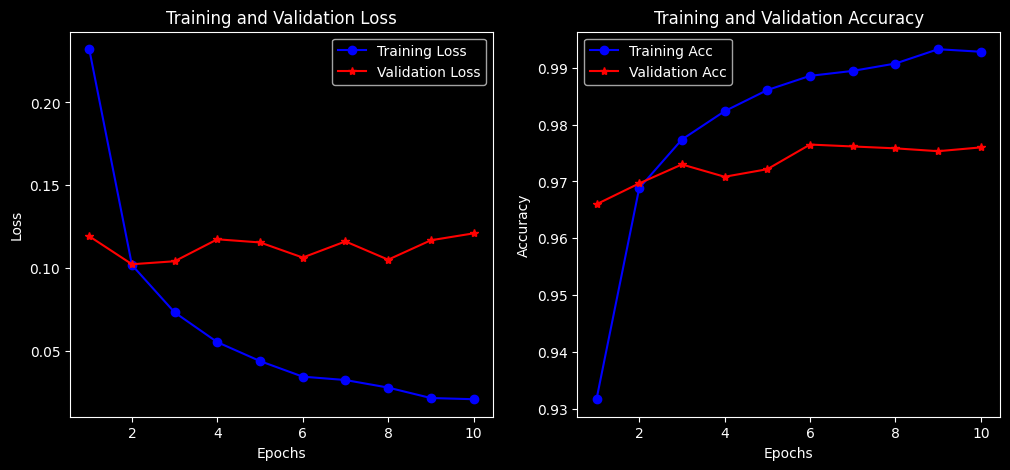

In [10]:
from common import plot_learning_curves

plot_learning_curves(history)